# Multiple Linear Regression Example


### What does Multiple Linear Regression mean?

Multiple linear regression is the most common form of linear regression analysis. As a predictive analysis, the multiple linear regression is used to explain the relationship between one continuous dependent variable and two or more independent variables.

### What is happening in this code?

In the code below we are taking in 4 independent variables(R&D Spend, Administration, Marketing Spend, and State) and one dependent variable (Profit) and using these variables to determine how the four independent variables affect the one dependent variable.


# Example




## Step One: Import the Libraries

The three libraries we will be importing from the get go will be numpy, matplotlib.pyplot, and pandas.

#### NumPy:
    is the fundamental package for scientific computing in Python. NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data.
    Typically, such operations are executed more efficiently and with less code than is possible using Python's built-in sequences.

#### matplotlib.pyplot:
    is going to help us graph our data and has shortcuts to allow us to label the graph as well. The google definition is "matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
    Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc."

#### pandas: 
    is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.
    It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step Two: Import the dataset

Next what we will be doing is importing the dataset.

First we create a variable called dataset. Dataset will have two columns. One column will be Years of Experience, and the other will be salary. In the next steps we will be seperating these out into our X and y variables so we can use them as points on our graph.

Second we will get all of our independent variables (R&D Spend, Administration, Marketing Spend, and State) and set them to X so we can use them on the X axis of our graph. We will be using the `.iloc` method from pandas because `.iloc` is a purely integer-location based on indexing for selection by position. `iloc[]` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

Third, almost identical to the second step, we will get all of our dependent variables (Profit) and set them to y so we can use it as the vector of our graph.

In [2]:
dataset = pd.read_csv('50_Startups.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

### Our full dataset

In [3]:
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

### Our Independent Variables

In [4]:
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

### Our Dependent Variables

In [5]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Step Three: Encoding Categorical Data

If you look at our independent variables, and look at the states, you will see that we have Strings which represent the state. Unfortunately if we leave the states as strings, this will skew our data results due to each character in the strings having a different numerical representation. So in order to avoid our data being skewed we have to change the string representaion of states to a numerical representation of the states. We do this with two imports from `sklearn.preprocessing`.

The first import `LabelEncoder()` will take the strings and turn them into numbers(California = 0, New York = 1 and so forth). 
However this alone will still skew our data results due to 0 being less than 1 and 1 being less than 2 etc. So to fix this we go to our next import `OneHotEncoder()`

`OneHotEncoder()` takes the output of label encoder and transforms it into x amount of variables. For example, we have 3 different states we are looking at so the method will create 3 dummy variables to represent those states. Then if that state is "Present" In the array, it will simply return a value of 1. If not then the dummy variable will return a value of 0.

For example

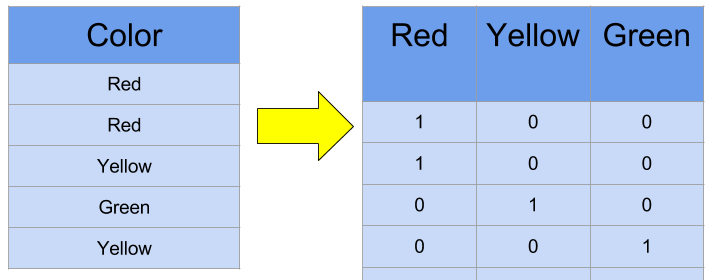


All of the arrays will have only one value of 1 and two values of 0 therefore not altering the output of the data, while still representing which state the data belongs to.



In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_x = LabelEncoder()
x[:, 3] = labelencoder_x.fit_transform(x[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()

### So the states will go from their string representation to their numerical representaion.


    The 0 column will represent Florida

    the 1 column will represent California

    the 2 column will represent New York

![alt text](https://gitlab.com/TylerwBridges/multiple-linear-regression/raw/master/img/Encoded_data.PNG)

## Avoiding the Dummy Variable Trap

So Although unnecesarry with the current libraries we are using, I wanted to take a second to talk about the "Dummy Variable Trap". Using categorical data in Multiple Regression Models is a powerful method to include non-numeric data types into a regression model. Categorical data refers to data values which represent categories - data values with a fixed and unordered number of values, for instance gender (male/female) or season (summer/winder/spring/fall). In a regression model, these values can be represented by dummy variables - variables containing values such as 1 or 0 representing the presence or absence of the categorical value.

By including dummy variable in a regression model however, one should be careful of the Dummy Variable Trap. The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others.

So to wrap it up, We are going to manually remove the row that represents California because that will make California our constant and when the columns representing New York and Florida both have 0, the computer will automatically assume it is California even if it may not know the "name".

In [7]:
x = x[:, 1:]


## Step Four: Splitting the dataset into the Training set and Test set

Next what we will be doing is splitting our dataset into our training set and our testing set.

Generally as a common practice, it is normal to split a training and test set by 80% going to training and 20% going to testing. The reason for this is, the larger training set you give a machine, the more accurate assumptions it will be able to make. For example, If we were trying to get a machine to predict salary for Software developers but only give it 10 examples, the machine will only be able to make a prediction based off of those ten samples and it wont be accurate for a majority of developers. However if you give a machine one thousand examples of salary it will have a lot more data to make assumptions and predictions from, returning a more accurate prediction.

So now, we will take our data so far (Our X and y variables) and split them into two sets.

The method we will use will be the `train_test_split` from `sklearn.cross_validation`. This method split arrays or matrices into random train and test subsets defined at the beginning of the line.

In [8]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

C:\Users\tBridges\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Step Five: Fitting Simple Linear regression to the Training set

We will be importing the `LinearRegression` method from `sklearn.linear_model`. The `LinearRegression()` method  uses the only the first feature of the dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The method we will be using, `fit`, Fits the points onto the linear model.

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step Six: Fitting Simple Linear regression to the Training set

We will be importing the `LinearRegression` method from `sklearn.linear_model`. The `LinearRegression()` method  uses the only the first feature of the dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The method we will be using, `fit`, Fits the points onto the linear model.


In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step Seven: Predicting the results

Now unfortunately we can not graph this like the simple linear regression due to the 5 different points we have which means that it would require a 5d graph so for now we will have to do with comparing the predictions with the actual answers.

In [12]:
y_pred = regressor.predict(x_test) 


## Results

So as you can see below our model did reasonably well predicting the profit for different states based on the 5 different variables passed into it. I believe based on the results we never had more than 15% error in what the actual profit would be.


![alt text](img/Prediction.png "Prediction")

